In [84]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from meus.printer import *
from datetime import datetime
import matplotlib.pyplot as plt

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-23'

In [85]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> artigo
2 -> caso_full.csv
3 -> cities.csv
4 -> covid19_municipios.csv
5 -> COVID19_REGIOES BR.csv
6 -> Dados_demográficos_municípios.xlsx
7 -> Dados_demográficos_municípios_new.xlsx
8 -> Datalab_COVID.pptx
9 -> figures
10 -> idade.xlsx
11 -> obito_cartorio.csv
12 -> População residente municipal x população faixa etária.csv
13 -> População residente por estado - 2015.csv
14 -> População residente x sexo.csv
15 -> results


In [124]:
date = 2
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,0,city,SP,0,0
1,NaN,35.0,2020-02-25,45919049.0,False,False,1,0.00218,2020-02-25,NaN,0,state,SP,0,0
2,São Paulo,3550308.0,2020-02-26,12252023.0,False,False,1,0.00816,2020-02-26,NaN,0,city,SP,0,0
3,NaN,35.0,2020-02-26,45919049.0,False,False,1,0.00218,2020-02-26,NaN,0,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,0,city,SP,0,0


In [125]:
df_cov = df_cov[(df_cov['date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
    "city",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df_cov = df_cov.rename(columns={
    "city": "City",
    "estimated_population_2019": "Population",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
    "last_available_death_rate": "Death Rate",
})
df_cov.head()

,City,Population,Confirmed,Deaths,Confirmed/100k,Death Rate
10115,Acrelândia,15256.0,9,0,58.99318,NaN
10116,Bujari,10266.0,1,0,9.74089,NaN
10117,Plácido de Castro,19761.0,4,0,20.24189,NaN
10118,Porto Acre,18504.0,1,0,5.40424,NaN
10119,Rio Branco,407319.0,55,2,13.50293,0.0364


In [126]:
# df_cities = pd.DataFrame()
# group = df_cov.groupby('city')
# df_cities['Municípios'] = g_population.sum().index
# df_cities['Confirmed'] = group['last_available_confirmed'].sum()
# df_cities['Deaths'] = group.sum()['last_available_deaths']
# df_cities['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
# df_cities.head()

In [127]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 10115 to 11034
Data columns (total 6 columns):
City              920 non-null object
Population        906 non-null float64
Confirmed         920 non-null int64
Deaths            920 non-null int64
Confirmed/100k    891 non-null float64
Death Rate        210 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ KB


In [128]:
date = 10
df_mun =  pd.read_excel('..\\'+directory[date])
df_mun.head()

,City,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+,Male,Female
0,Coronel Pilar,36,91,89,74,65,107,78,14,102,87,203,189,135,116,141,113,98,918,820
1,Santiago do Sul,84,76,89,109,120,105,77,55,83,127,117,81,81,63,36,31,31,685,680
2,Alto Alegre,107,91,94,141,97,120,129,59,134,190,128,129,121,98,69,44,81,938,894
3,Nova Castilho,124,71,75,110,72,92,66,62,119,91,79,65,51,49,42,28,20,622,594
4,Almirante Tamandaré do Sul,153,53,55,117,112,165,155,64,126,166,170,187,197,156,89,53,74,1053,1039


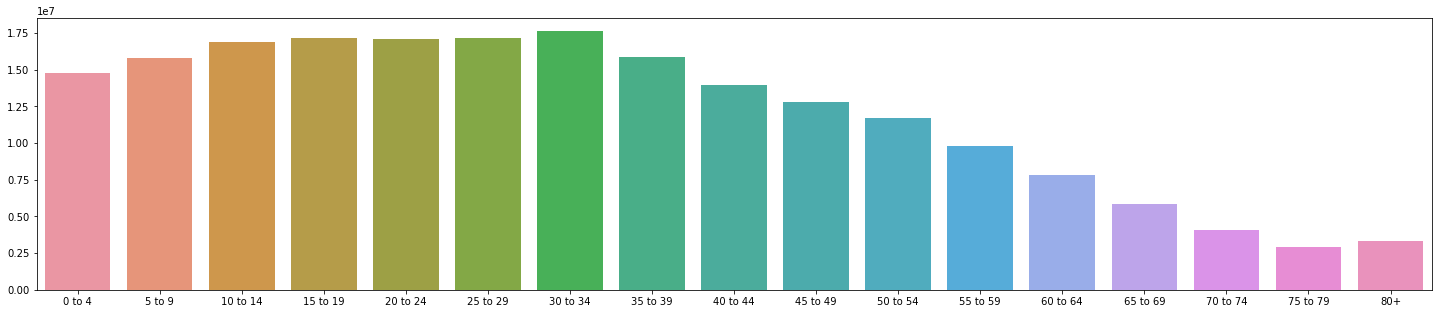

In [129]:
plt.figure(figsize=(25,5))
sns.barplot(
    x=df_mun[df_mun.columns[1:-2]].sum().index,
    y=df_mun[df_mun.columns[1:-2]].sum().values
)

In [130]:
df_mun_ed = pd.DataFrame();
df_mun_ed['City'] = df_mun['City']
df_mun_ed['Children'] = df_mun['0 to 4'] + df_mun['5 to 9']
df_mun_ed['Teenager'] = df_mun['10 to 14'] + df_mun['15 to 19']
df_mun_ed['Young adults'] = df_mun['20 to 24'] + df_mun['25 to 29']
df_mun_ed['Adults'] = df_mun['30 to 34'] + df_mun['35 to 39'] + df_mun['40 to 44'] + df_mun['45 to 49'] + df_mun['50 to 54'] + df_mun['55 to 59'] + df_mun['60 to 64']
df_mun_ed['Seniors'] = df_mun['65 to 69'] + df_mun['70 to 74'] + df_mun['75 to 79'] + df_mun['80+']
df_mun_ed['Population_Age'] = df_mun_ed['Children'] + df_mun_ed['Teenager'] + df_mun_ed['Young adults'] + df_mun_ed['Adults'] + df_mun_ed['Seniors']
df_mun_ed['%Children'] = round(df_mun_ed['Children']/df_mun_ed['Population_Age'], 2)
df_mun_ed['%Teenager'] = round(df_mun_ed['Teenager']/df_mun_ed['Population_Age'], 2)
df_mun_ed['%Young adults'] = round(df_mun_ed['Young adults']/df_mun_ed['Population_Age'], 2)
df_mun_ed['%Adults'] = round(df_mun_ed['Adults']/df_mun_ed['Population_Age'], 2)
df_mun_ed['%Seniors'] = round(df_mun_ed['Seniors']/df_mun_ed['Population_Age'], 2)
df_mun_ed['Male'] = df_mun['Male']
df_mun_ed['Female'] = df_mun['Female']
df_mun_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 14 columns):
City              5568 non-null object
Children          5568 non-null int64
Teenager          5568 non-null int64
Young adults      5568 non-null int64
Adults            5568 non-null int64
Seniors           5568 non-null int64
Population_Age    5568 non-null int64
%Children         5568 non-null float64
%Teenager         5568 non-null float64
%Young adults     5568 non-null float64
%Adults           5568 non-null float64
%Seniors          5568 non-null float64
Male              5568 non-null int64
Female            5568 non-null int64
dtypes: float64(5), int64(8), object(1)
memory usage: 609.1+ KB


In [131]:
df = pd.merge(df_cov, df_mun_ed, on="City")
df['Population_COVID'] = df['Population'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 20 columns):
City                1020 non-null object
Population          1020 non-null float64
Confirmed           1020 non-null int64
Deaths              1020 non-null int64
Confirmed/100k      1004 non-null float64
Death Rate          230 non-null float64
Children            1020 non-null int64
Teenager            1020 non-null int64
Young adults        1020 non-null int64
Adults              1020 non-null int64
Seniors             1020 non-null int64
Population_Age      1020 non-null int64
%Children           1020 non-null float64
%Teenager           1020 non-null float64
%Young adults       1020 non-null float64
%Adults             1020 non-null float64
%Seniors            1020 non-null float64
Male                1020 non-null int64
Female              1020 non-null int64
Population_COVID    1020 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 167.3+ KB


In [132]:
g = 1
print_campo = 'n'
col1 = 'Confirmed/100k'
col2 = '%Adults'
# try:
#     os.mkdir(col2)
#     print('Directory created')
# except FileExistsError:
#     print('Directory already exists')    

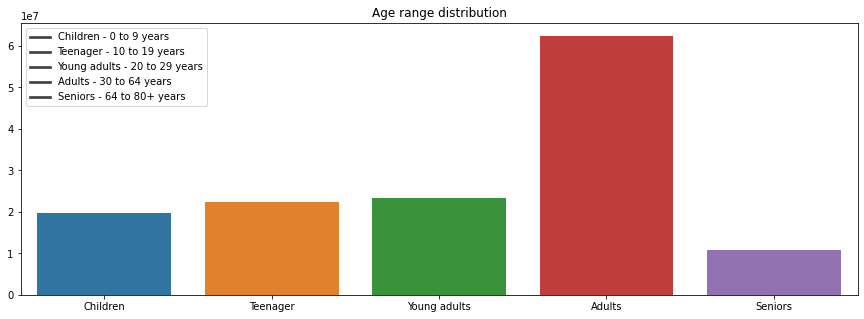

In [133]:
plt.figure(figsize=(15,5))
sns.barplot(
    x=df[df.columns[6:-9]].sum().index,
    y=df[df.columns[6:-9]].sum().values
)
plt.title('Age range distribution')
plt.legend([
    df.columns[6]+" - 0 to 9 years",
    df.columns[7]+" - 10 to 19 years",
    df.columns[8]+" - 20 to 29 years",
    df.columns[9]+" - 30 to 64 years",
    df.columns[10]+" - 64 to 80+ years",
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [134]:
list_col = list()
index_col = [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 18]
for k, v in enumerate(df.columns):
    if k in index_col:
        list_col.append(v)
df = df[df[col1] < 400][list_col]
df.head()

,City,Population,Confirmed,Deaths,Confirmed/100k,Death Rate,%Children,%Teenager,%Young adults,%Adults,%Seniors,Male,Female
0,Acrelândia,15256.0,9,0,58.99318,NaN,0.20,0.22,0.17,0.37,0.04,7238,6629
1,Bujari,10266.0,1,0,9.74089,NaN,0.20,0.22,0.16,0.37,0.04,5001,4335
2,Plácido de Castro,19761.0,4,0,20.24189,NaN,0.22,0.22,0.15,0.36,0.05,9595,8562
3,Porto Acre,18504.0,1,0,5.40424,NaN,0.20,0.22,0.16,0.36,0.06,8801,7956
4,Rio Branco,407319.0,55,2,13.50293,0.0364,0.14,0.14,0.17,0.45,0.10,2550,2491


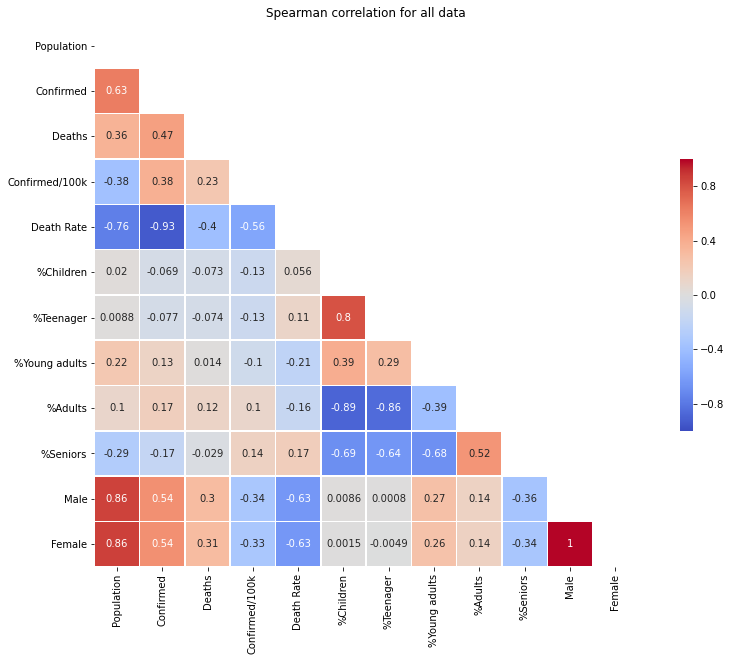

In [135]:
corr = df[list_col].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

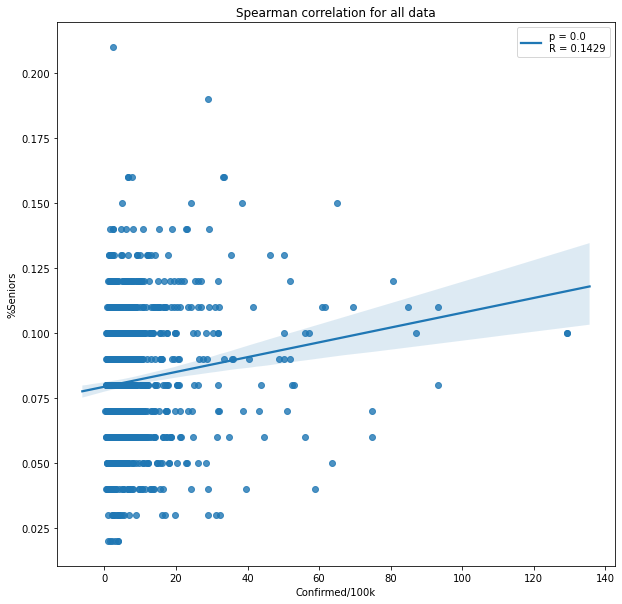

In [136]:
col2 = df.columns[10]
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

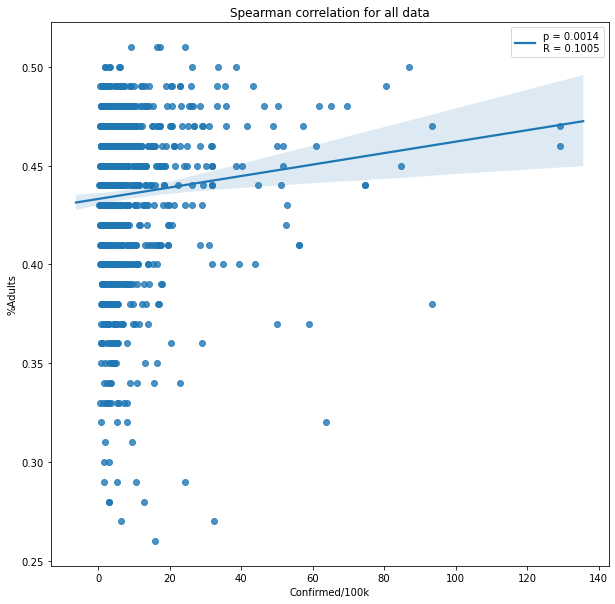

In [137]:
col2 = df.columns[9]
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

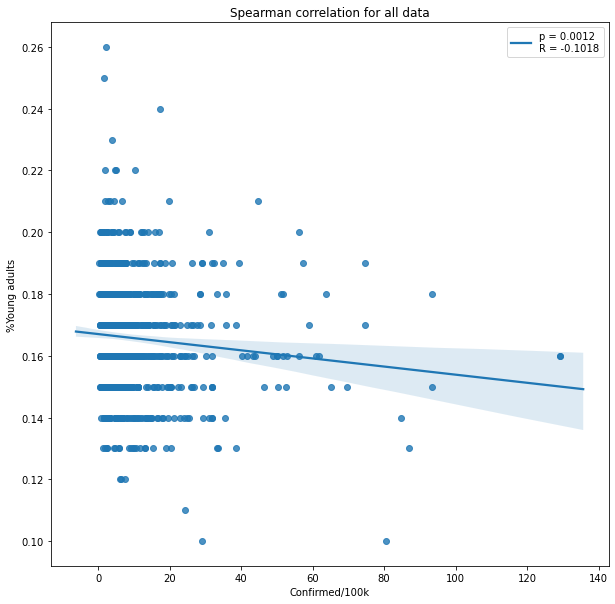

In [138]:
col2 = df.columns[8]
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

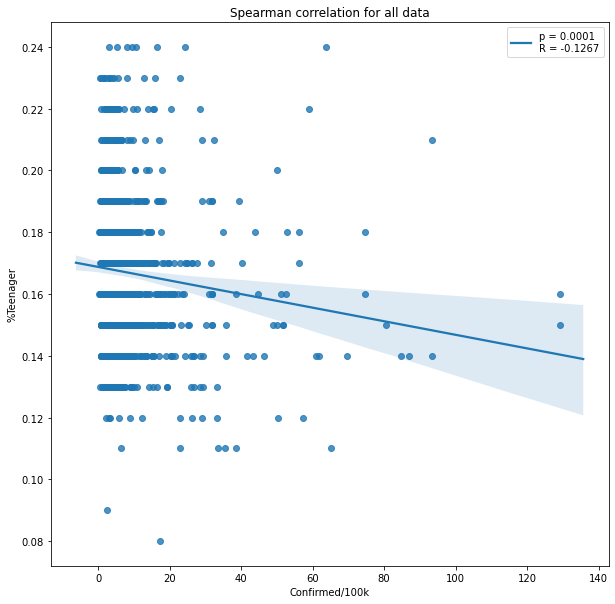

In [139]:
col2 = df.columns[7]
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

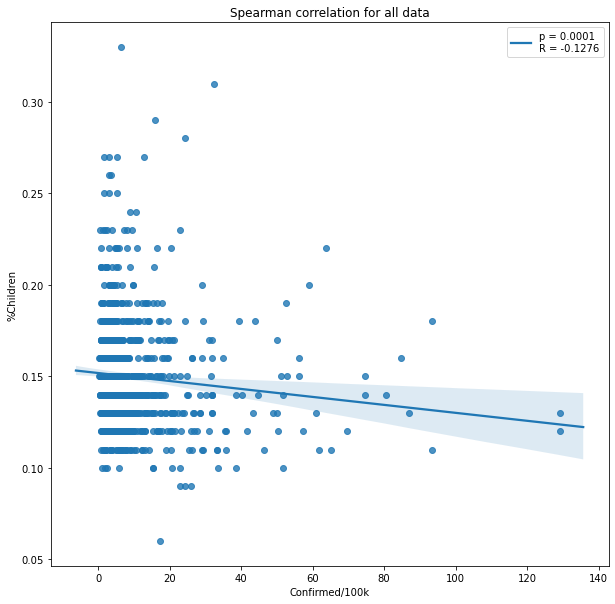

In [140]:
col2 = df.columns[6]
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)